In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv("carprices.csv")
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [7]:
dummy_v = pd.get_dummies(df['Car Model']) #Getting Dummy variable for categorical variable in the data (Mercedez Benz C class)

In [9]:
merged = pd.concat([df,dummy_v], axis = 'columns')
merged #Merging dummy variable with the main dataframe

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [13]:
#Now to make it efficient drop column 1 and also one from dummy
final = merged.drop(['Car Model', 'Mercedez Benz C class'], axis  = 'columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [15]:
x = final.drop(['Sell Price($)'], axis  = 'columns')
x  #Creating x variable

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [21]:
y = final['Sell Price($)']
y  #Creating y variable

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [22]:
model = linear_model.LinearRegression() #creating instance of Linear Regression Class and assigning it to model
model.fit(x,y)   #fitting model

LinearRegression()

In [25]:
model.predict([[68000,6,0,0]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25813.60178446])

In [38]:
model.score(x,y) #Checking Accuracy

0.9417050937281083

In [26]:
final.describe() #analysing statics of data

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
count,13.000000,13.000000,13.000000,13.000000,13.000000
mean,60884.615385,26023.076923,5.307692,0.307692,0.384615
std,19185.665055,8003.661021,1.652504,0.480384,0.506370
min,22500.000000,12000.000000,2.000000,0.000000,0.000000
25%,52000.000000,20000.000000,5.000000,0.000000,0.000000
50%,59000.000000,26100.000000,5.000000,0.000000,0.000000
75%,72000.000000,32000.000000,6.000000,1.000000,1.000000
max,91000.000000,40000.000000,8.000000,1.000000,1.000000


Text(0, 0.5, 'Sell Price($)')

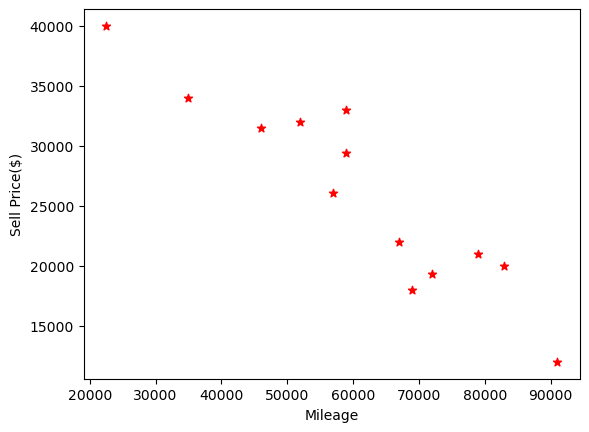

In [35]:
#Plotting some statics

plt.scatter(x['Mileage'], y, marker = "*", color = 'red')
plt.xlabel("Mileage")
plt.ylabel("Sell Price($)")